In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [3]:
#Affichage des 5 premières lignes de l'ensemble de données d'actualités réelles
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#Affichage des 5 premières lignes de l'ensemble de données de fake news
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#Forme d'un ensemble de données d'actualités réelles et de données de fake news
print("Real news: ",real.shape)
print("Fake News: ", fake.shape)



Real news:  (21417, 4)
Fake News:  (23481, 4)


In [6]:
#Attribution d'une valeur de 0 à toutes les données d'actualité réelles et les placer dans la trame de données

class0 = []

for i in range(21417):
  class0.append(0)

real.insert(4, "class", class0, True)

In [7]:
#Attribution d'une valeur de 1 à toutes les fausses données d'actualités et les placer dans la trame de données
class1 = []

for i in range(23481):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [8]:
#Concactiné les fausses nouvelles et les vraies nouvelles en 1 ensemble de données total

total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [9]:
#total
total.shape

(44898, 5)

In [10]:
pd.set_option('display.width', total.shape[0])
total.head()

,title,text,subject,date,class
19911,North Korea says goal is 'equilibrium' with U....,SEOUL (Reuters) - North Korea s goal is reachi...,worldnews,"September 15, 2017",0
2942,Kissinger calls Putin-Trump meeting a chance t...,MOSCOW (Reuters) - Donald Trump and Vladimir P...,politicsNews,"June 30, 2017",0
11159,U.S. immigration case could set limits on pres...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"January 21, 2016",0
20009,"China urges peaceful, diplomatic resolution to...",BEIJING (Reuters) - China s Foreign Ministry s...,worldnews,"September 15, 2017",0
14176,WHOA! JOHN KASICH Makes A Crazy Prediction Abo...,Could the people behind this delusional candid...,politics,"Apr 3, 2016",1


In [11]:
#Extraire uniquement les valeurs pour le titre (entrée) et la classe (sortie)
data = total[['title','class']]
data.head()

,title,class
19911,North Korea says goal is 'equilibrium' with U....,0
2942,Kissinger calls Putin-Trump meeting a chance t...,0
11159,U.S. immigration case could set limits on pres...,0
20009,"China urges peaceful, diplomatic resolution to...",0
14176,WHOA! JOHN KASICH Makes A Crazy Prediction Abo...,1


In [12]:
#Nombre de caractères des titres - Min, Moyenne, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())

Mean Length 80.11171989843646
Min Length 8
Max Length 286


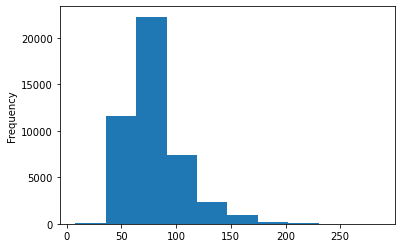

In [13]:
# tracer la fréquence des caractères sur un histogramme
import seaborn as sns

x = data['title'].apply(len).plot.hist()

In [14]:
#Data Preprocessing


#Lettres minuscule
data['title'] = data['title'].str.lower()
data.head()


#S'assurer que toutes les ponctuations nécessaires sont dans une liste
#Inclure ' et " car ils ne sont pas par défaut

import string
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)

#Supprimer toutes les ponctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text


# Appliquer à la série DF
data['title'] = data['title'].apply(removePunc)
data.head()


#Importer la bibliothèque de prétraitement nltk pour convertir le texte dans un format lisible 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize


#Tokeniser la chaîne (créer une liste -> chaque index est un mot)
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
data.head()

#Définir le modèle de lemmatisation du texte (par exemple : les promenades seront changées en marche)
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


#Parcourir la trame de données du titre et lemmatiser chaque mot
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)

data.head()




#Définir tous les mots vides en anglais (it, was, for, etc.)
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stopwords)
#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])





data.head()

<ipython-input-14-c5a1fcaa1e88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].str.lower()


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


<ipython-input-14-c5a1fcaa1e88>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(removePunc)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nesrine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nesrine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nesrine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
<ipython-input-14-c5a1fcaa1e88>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<WordListCorpusReader in 'C:\\Users\\Nesrine\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


<ipython-input-14-c5a1fcaa1e88>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])


,title,class
19911,"[north, korea, say, goal, equilibrium, u, test...",0
2942,"[kissinger, call, putintrump, meeting, chance,...",0
11159,"[u, immigration, case, could, set, limit, pres...",0
20009,"[china, urge, peaceful, diplomatic, resolution...",0
14176,"[whoa, john, kasich, make, crazy, prediction, ...",1


In [16]:
#Extraction de tableaux numpy pour le titre et les classes
titles = data["title"].values
labels = data["class"].values

from sklearn.model_selection import train_test_split
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)

In [18]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [19]:
indiv = []
for i in title_train:
  temp = np.array(embed(i))
 
  indiv.append(temp)

In [20]:
import tensorflow as tf

indiv = tf.keras.preprocessing.sequence.pad_sequences(indiv,dtype='float')

In [21]:
indiv.shape

(35918, 34, 250)

In [22]:
test = []

for i in title_test:
  temp = np.array(embed(i))
  test.append(temp)

In [23]:
test = tf.keras.preprocessing.sequence.pad_sequences(test,dtype='float')


In [24]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])


In [ ]:
model.fit(indiv, y_train,validation_data=[test,y_test],epochs=10)


Epoch 1/10
1085/1123 [===========================>..] - ETA: 1s - loss: 0.3668 - accuracy: 0.8414

In [ ]:
val = []

sample = np.array([['vaccines','do','not','work']])
for i in sample:
  temp = np.array(embed(i))
  val.append(temp)

In [ ]:
val = np.array(val)
model.predict(val)